In [1]:
# Question 10: Implementing a Custom Clustering Algorithm
# Description: Design and implement a simple custom clustering algorithm using Python for educational purposes.

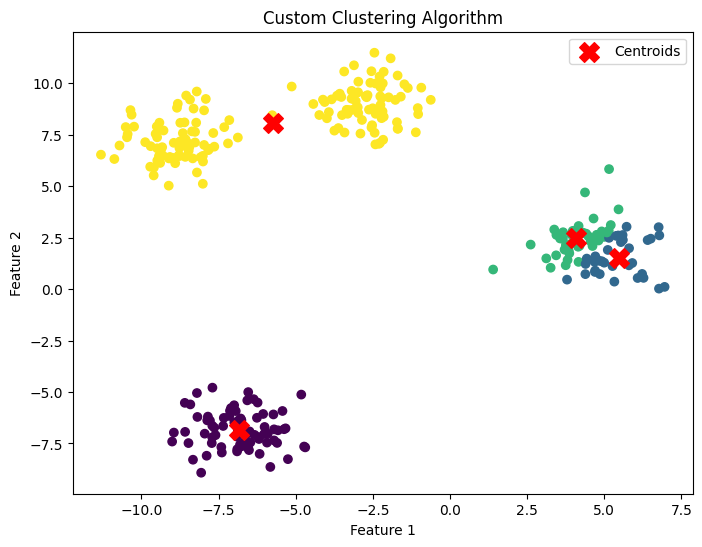

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Custom Clustering Algorithm: K-Means like but simplified
class SimpleKMeans:
    def __init__(self, n_clusters=3, max_iter=100):
            self.n_clusters = n_clusters
            self.max_iter = max_iter

    def fit(self, X):
        # Initialize random centroids
        random_idx = np.random.choice(X.shape[0], self.n_clusters, replace=False)
        self.centroids = X[random_idx]

        for _ in range(self.max_iter):
            # Assign each point to the nearest centroid
            self.labels_ = self._assign_labels(X)

            # Update centroids based on the mean of the points in each cluster
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])

            # If centroids do not change, stop the algorithm
            if np.all(new_centroids == self.centroids):
                break
            self.centroids = new_centroids
    
    def _assign_labels(self, X):
        # Compute distances between each point and each centroid
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)
    
    def predict(self, X):
        return self._assign_labels(X)

# Generate synthetic dataset
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Apply the custom SimpleKMeans algorithm
model = SimpleKMeans(n_clusters=4)
model.fit(X)
labels = model.predict(X)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(model.centroids[:, 0], model.centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('Custom Clustering Algorithm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()